In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv(r"C:\Users\munir\Downloads\internship projects/movies.csv", encoding='latin1')
movie.dropna(inplace=True)
movie.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [3]:
movie.shape

(5659, 10)

In [4]:
movie.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [5]:
movie.isnull().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [6]:
movie.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [7]:
# Ensure 'Votes' column is numeric
movie['Votes'] = pd.to_numeric(movie['Votes'], errors='coerce')
# Drop rows where 'Votes' could not be converted to numeric
movie.dropna(subset=['Votes'], inplace=True)
movie.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
(2003)    260.987179
(2008)    260.190476
(2010)    258.540541
(2009)    256.443038
(2002)    253.450000
             ...    
(1933)     12.000000
(1932)     12.000000
(1938)     10.600000
(1939)      9.500000
(1934)      8.500000
Name: Votes, Length: 91, dtype: float64

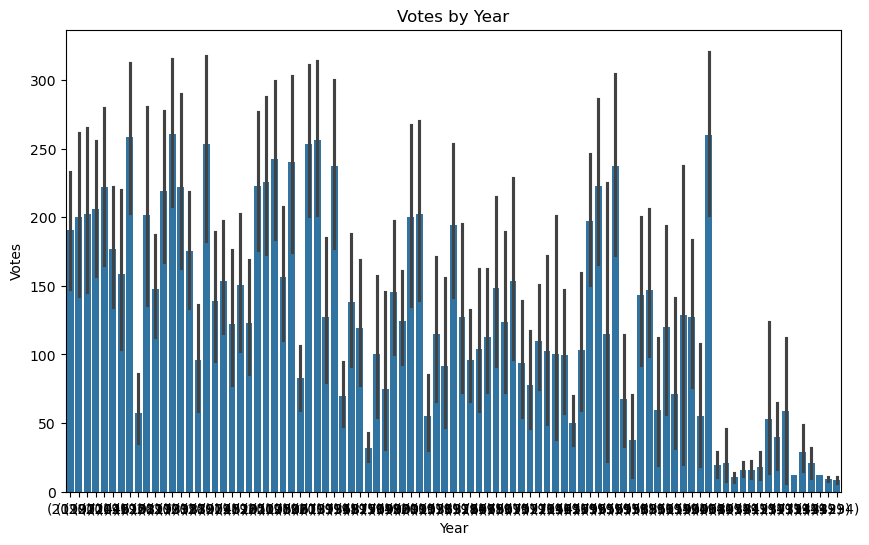

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Votes', data=movie)
plt.title('Votes by Year')
plt.show()


In [10]:
# Renaming the columns of the DataFrame
movie.columns = ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Grouping by 'Director' and calculating the mean rating, then sorting in descending order
movie.groupby('Director')['Rating'].mean().sort_values(ascending=False)


Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Suhrud Godbole       9.4
Munni Pankaj         9.4
Arvind Pratap        9.4
                    ... 
Rajesh Bajaj         1.9
Stanley D'Costa      1.8
Raajeev Walia        1.8
Pramod Mandloi       1.7
Sachindra Sharma     1.6
Name: Rating, Length: 2095, dtype: float64

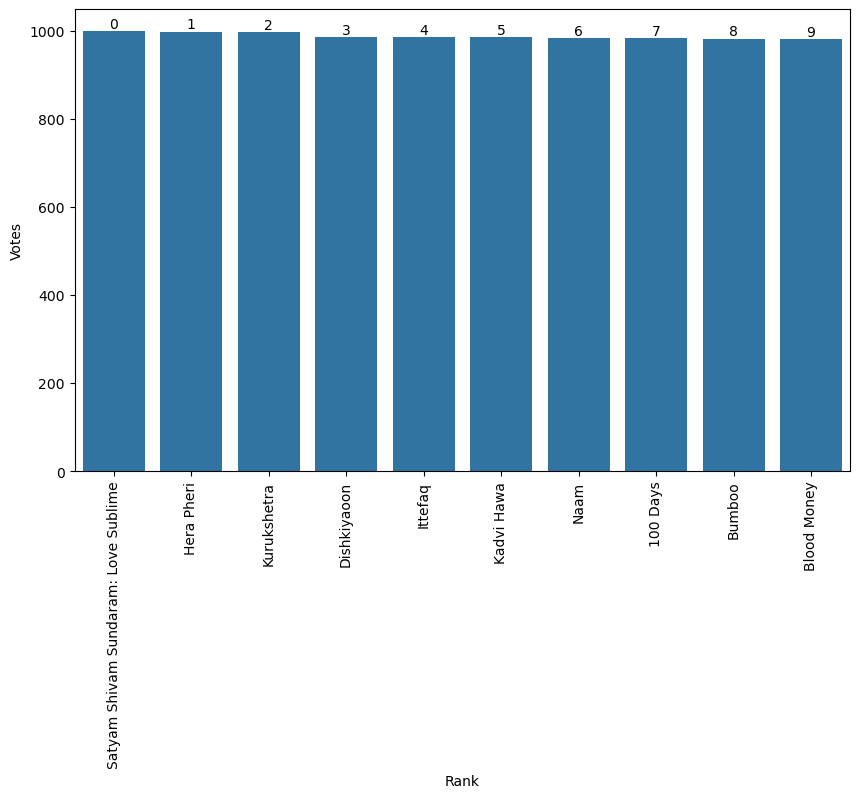

In [11]:
# Remove #,, and spaces from the 'name' column
movie['Name'] = movie['Name'].str.replace('#', '').str.replace(',','').str.strip()
# Sort the data by 'Votes' in descending order and select the top 10rows
top_movies = movie.nlargest(10, 'Votes')
top_movies['Rank'] = range(0, 10)
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Votes', data=top_movies)
plt.xticks(top_movies['Rank'], top_movies['Name'], rotation=90)
for i, row in top_movies.iterrows():
 plt.text(row['Rank'], row['Votes'], f"{row['Rank']}", ha='center',va='bottom')
plt.show()

C:\Users\munir\AppData\Local\Temp\ipykernel_15536\2678519219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie['Rating'])


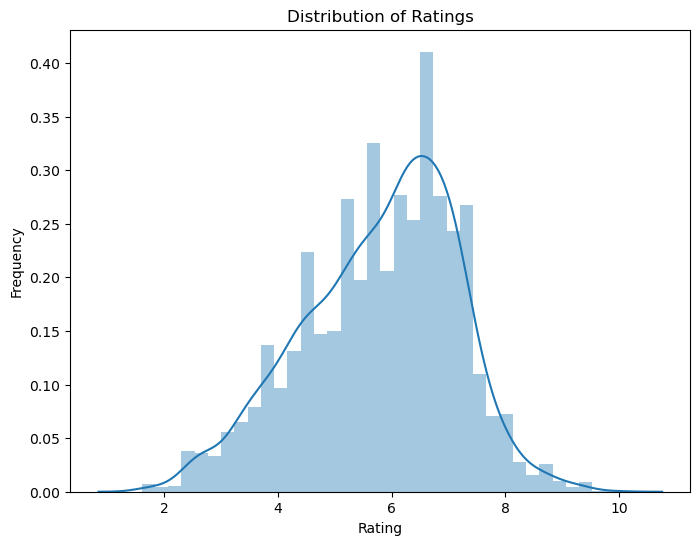

In [12]:
plt.figure(figsize=(8, 6))
sns.distplot(movie['Rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

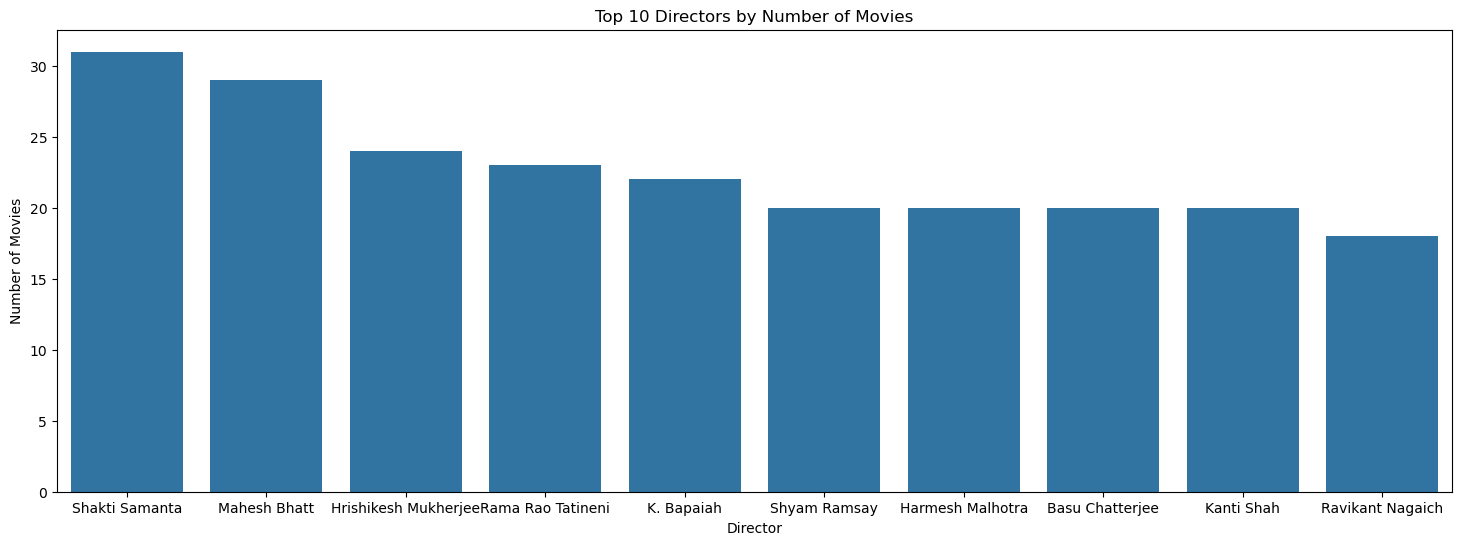

In [13]:
director_counts = movie['Director'].value_counts().head(10)
plt.figure(figsize=(18, 6))
sns.barplot(x=director_counts.index, y=director_counts.values)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

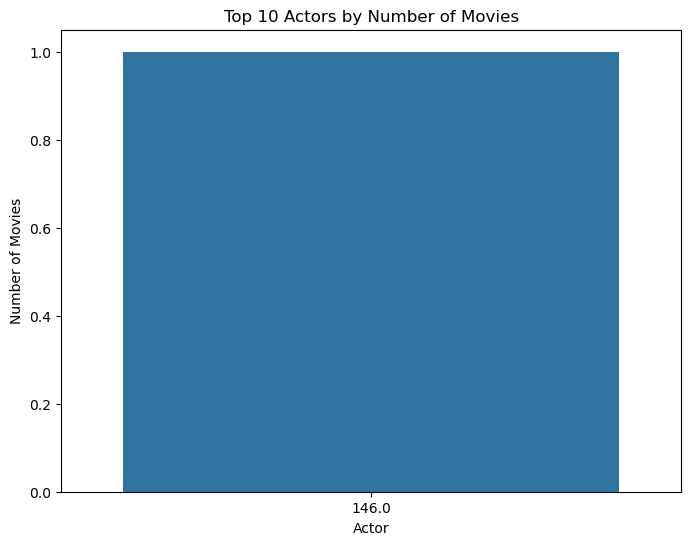

In [14]:
actor1_counts = movie['Actor 1'].value_counts().head(10)
actor2_counts = movie['Actor 2'].value_counts().head(10)
actor3_counts = movie['Actor 3'].value_counts().head(10)
actor_counts = actor1_counts.add(actor2_counts).add(actor3_counts)
actor_counts = actor_counts.value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=actor_counts.index, y=actor_counts.values)
plt.title('Top 10 Actors by Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.show()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\munir\AppData\Local\Temp\ipykernel_15536\3270359981.py:1: SyntaxWarning: invalid escape sequence '\d'
  movie['Duration'] = movie['Duration'].str.extract('(\d+)',expand=False).astype(int)
C:\Users\munir\AppData\Local\Temp\ipykernel_15536\3270359981.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie['Duration'])


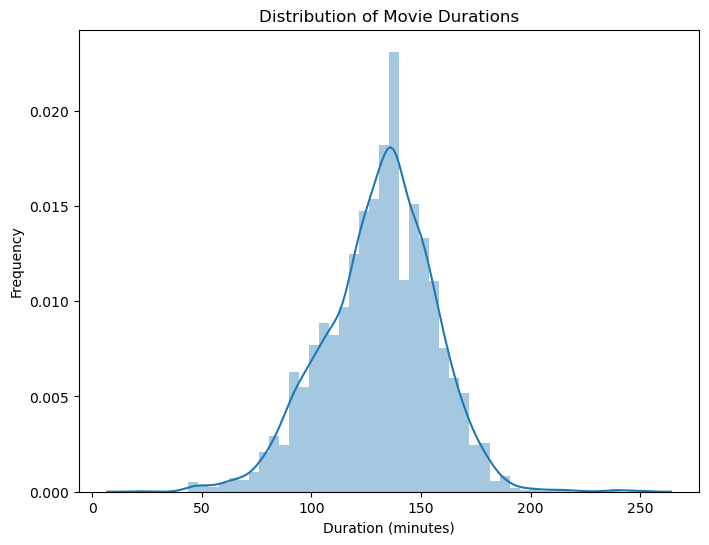

In [15]:
movie['Duration'] = movie['Duration'].str.extract('(\d+)',expand=False).astype(int)
plt.figure(figsize=(8, 6))
sns.distplot(movie['Duration'])
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


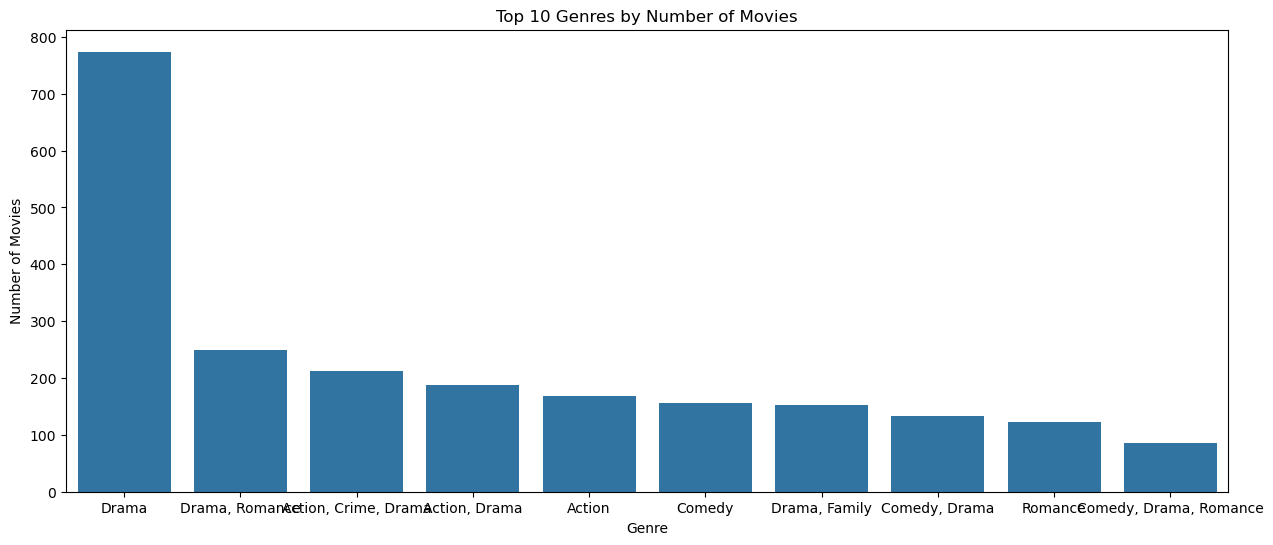

In [16]:
genre_counts = movie['Genre'].value_counts().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Genres by Number of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

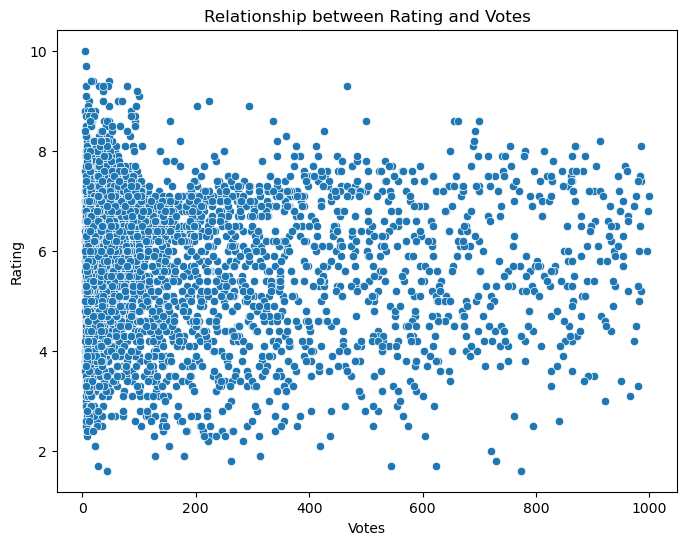

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Rating', data=movie)
plt.title('Relationship between Rating and Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

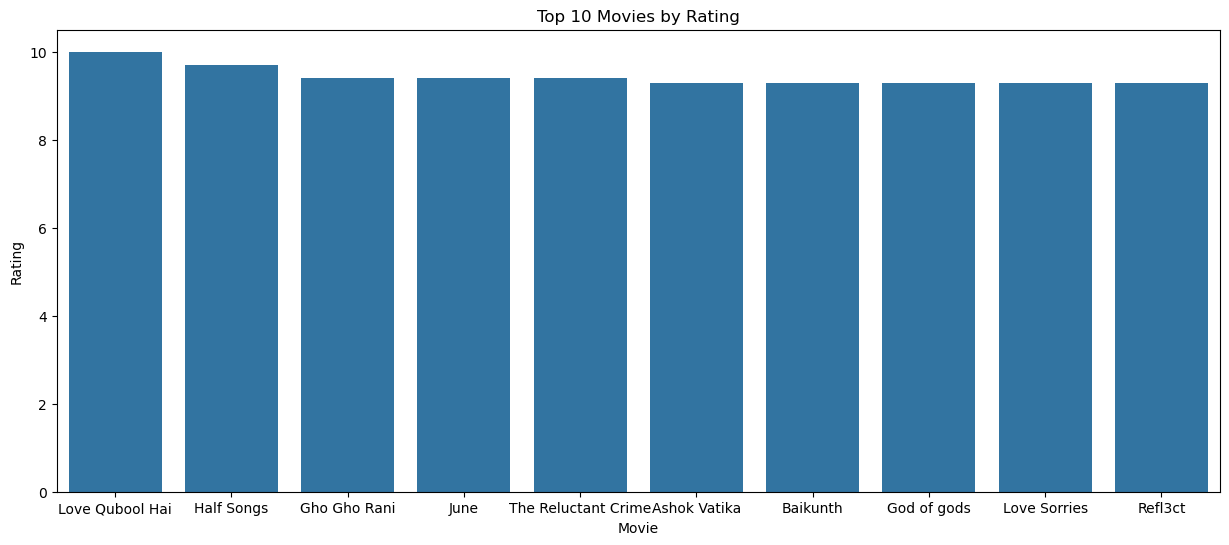

In [18]:
top_movies = movie.nlargest(10, 'Rating')
plt.figure(figsize=(15, 6))
sns.barplot(x='Name', y='Rating', data=top_movies)
plt.title('Top 10 Movies by Rating')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.show()

In [19]:
movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

array([[<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Votes'}>, <Axes: >]], dtype=object)

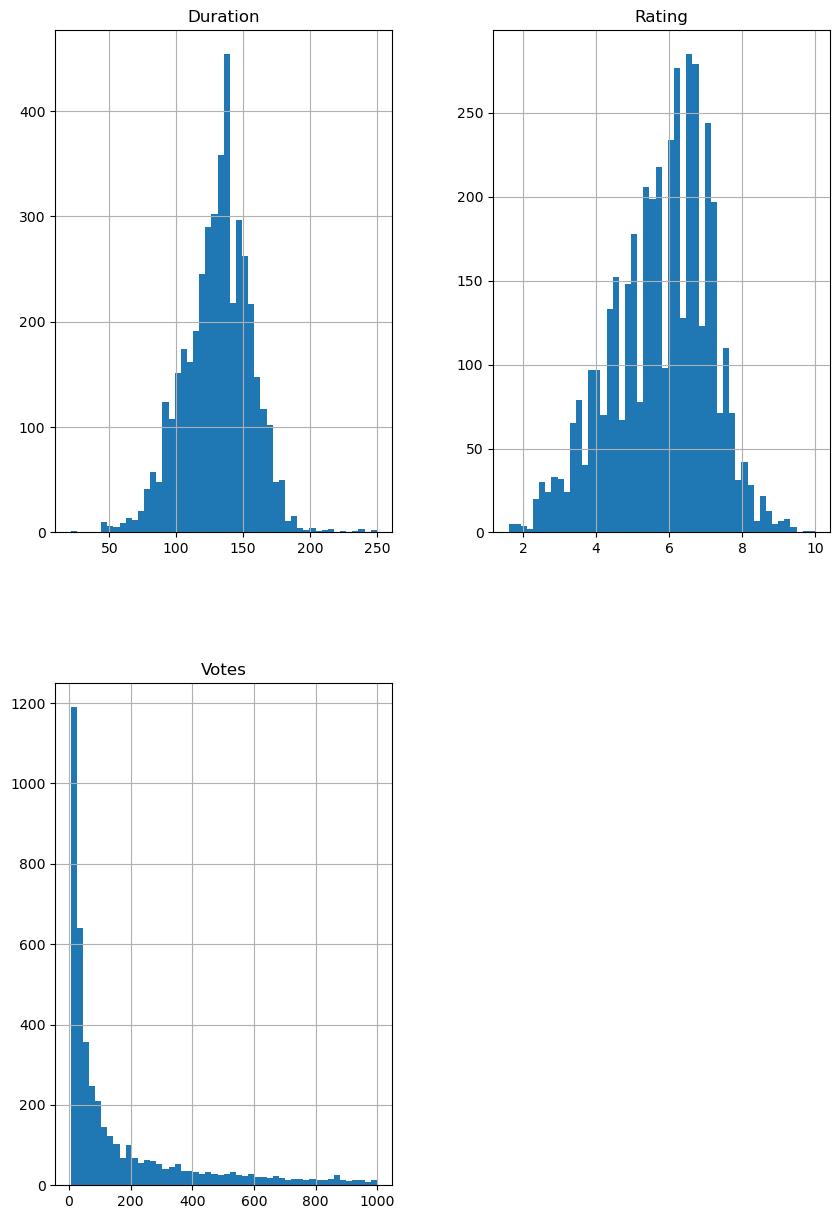

In [20]:
movie.hist(bins=50, figsize=(10,15))

In [21]:
# Grouping the columns with their average rating and then creating a new feature
genre_mean_rating = movie.groupby('Genre')['Rating'].transform('mean')
movie['Genre_mean_rating'] = genre_mean_rating
director_mean_rating = movie.groupby('Director')['Rating'].transform('mean')
movie['Director_encoded'] = director_mean_rating
actor1_mean_rating = movie.groupby('Actor 1')['Rating'].transform('mean')
movie['Actor1_encoded'] = actor1_mean_rating
actor2_mean_rating = movie.groupby('Actor 2')['Rating'].transform('mean')
movie['Actor2_encoded'] = actor2_mean_rating
actor3_mean_rating = movie.groupby('Actor 3')['Rating'].transform('mean')
movie['Actor3_encoded'] = actor3_mean_rating
X = movie[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor1_encoded','Actor2_encoded', 'Actor3_encoded']]
y = movie['Rating']


Spliting the data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

Model Testing


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error, r2_score
# Building 2 machine learning models and training them
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
lr = LinearRegression()
lr.fit(X_train_encoded,y_train)
lr_pred = lr.predict(X_test_encoded)
rf = RandomForestRegressor()
rf.fit(X_train_encoded,y_train)
rf_pred = rf.predict(X_test_encoded)
# Evaluating the performance of trained algos
print('The performance evaluation of Logistic Regression is below: ','\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')
print('The performance evaluation of Random Forest Regressor is below:', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))


The performance evaluation of Logistic Regression is below:  

Mean squared error:  1270162842703650.2
Mean absolute error:  1215999.1103271048
R2 score:  -641685701682745.1


The performance evaluation of Random Forest Regressor is below: 

Mean squared error:  0.24396245518044254
Mean absolute error:  0.326222351571595
R2 score:  0.8767502764421264
